In [81]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
#imporrt the dataset
data = pd.read_csv('car_age_price.csv')

In [83]:
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [84]:
data.shape

(112, 2)

In [85]:
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [87]:
data.isna().sum()

Year     0
Price    0
dtype: int64

In [88]:
data.nunique()

Year      8
Price    35
dtype: int64

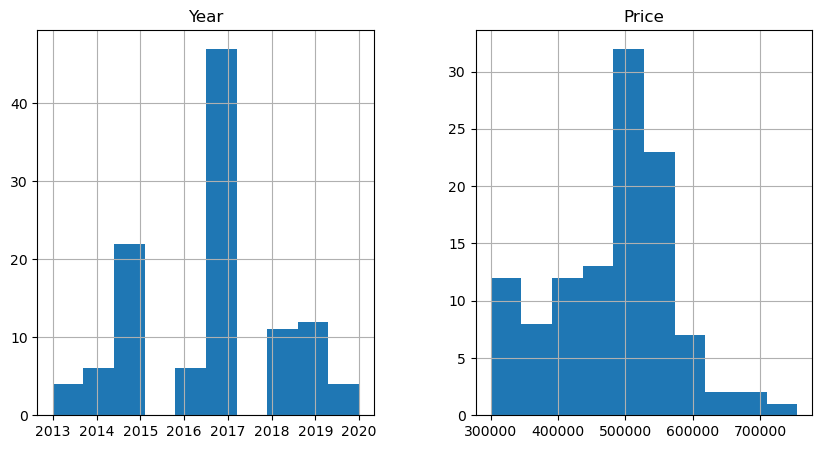

In [89]:
freqgraph = data.select_dtypes(include=['int'])
freqgraph.hist(figsize=(10,5))
plt.show()

<AxesSubplot:>

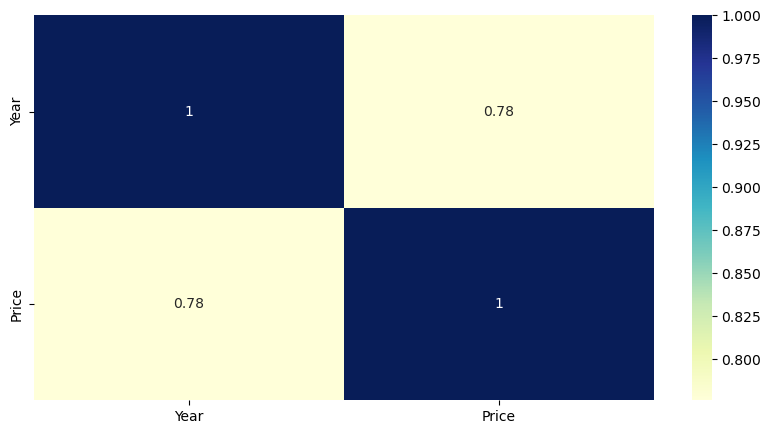

In [90]:
#heat map
corrmatrix = data.corr()
plt.subplots(figsize=(10,5))
sns.heatmap(corrmatrix,annot=True,cmap='YlGnBu')

In [91]:
#Data spliting
y=data['Price']
x=data.drop(['Price'],axis=1)

In [92]:
x

,Year
0,2018
1,2019
2,2019
3,2018
4,2018
...,...
107,2016
108,2014
109,2015
110,2016


In [93]:
y

0      465000
1      755000
2      700000
3      465000
4      465000
        ...  
107    375000
108    300000
109    425000
110    420000
111    425000
Name: Price, Length: 112, dtype: int64

In [94]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=42)

# Linear Regression model

In [95]:

from sklearn import linear_model
lr = linear_model.LinearRegression()

In [96]:
model = lr.fit(x_train,y_train)

In [97]:
y_pred = model.predict(x_test)

In [98]:
y_pred

array([599223.07304102, 505265.04214995, 552244.05759549, 552244.05759549,
       552244.05759549, 411307.01125886, 505265.04214995, 552244.05759549,
       599223.07304102, 599223.07304102, 317348.98036776, 505265.04214995,
       411307.01125886, 646202.08848657, 552244.05759549, 599223.07304102,
       317348.98036776, 411307.01125886, 505265.04214995, 505265.04214995,
       505265.04214995, 505265.04214995, 505265.04214995, 505265.04214995,
       505265.04214995, 505265.04214995, 411307.01125886, 411307.01125886])

In [99]:
y_test

40     525000
65     495000
4      465000
47     450000
42     550000
69     300000
26     550000
11     500000
10     500000
44     550000
73     320000
55     550000
68     465000
97     640000
0      465000
18     500000
53     345000
80     390000
103    375000
91     520000
36     550000
12     500000
31     550000
66     525000
90     520000
62     540000
22     434999
85     320000
Name: Price, dtype: int64

In [100]:
#checking MSE and r2 score
from sklearn.metrics import mean_squared_error
print ('MSE =' , mean_squared_error(y_test,y_pred))

MSE = 3878767151.0731072


In [101]:
from sklearn.metrics import r2_score
print('r2 score = ',r2_score(y_test,y_pred))

r2 score =  0.4347961632108521


# Lasso Regression

In [102]:
from sklearn.linear_model import Lasso
lasso=Lasso()

In [103]:
lasso.fit(x_train,y_train)

Lasso()

In [104]:
x_pred_lasso_test=lasso.predict(x_test)

In [105]:
#checking r2 score
print('r2 score = ',r2_score(y_test,x_pred_lasso_test))

r2 score =  0.4348007175862566
